In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from pathlib import Path
import os
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  22.1M      0  0:00:03  0:00:03 --:--:-- 22.1M


In [ ]:
import numpy as np
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
      for fname in (path/label).glob('*.*'):
        #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
        texts.append(fname.open('r', encoding='utf-8').read())
        labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels

In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [ ]:
for t in trn_texts[:10]:
  print(t)
  print('\n')

This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don't forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, all

In [ ]:
#Text preprocessing

In [ ]:
trn_texts[0]

'This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don\'t forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, a

In [ ]:
s = trn_texts[0]
s.split()

['This',
 'movie',
 'was',
 'God-awful,',
 'from',
 'conception',
 'to',
 'execution.',
 'The',
 'US',
 'needs',
 'to',
 'set',
 'up',
 'a',
 '"Star',
 'Wars"',
 'site',
 'in',
 'this',
 'remote',
 'country?',
 'This',
 'is',
 'their',
 'premise?',
 'The',
 'way',
 'to',
 'gain',
 'access,',
 'the',
 'US',
 'concludes,',
 'is',
 'to',
 'win',
 'an',
 'obstacle',
 'course',
 'like',
 'cross-country',
 'race,',
 'where',
 'the',
 'winner',
 'can',
 'ask',
 'anything',
 'of',
 'the',
 'leader.',
 'And',
 'who',
 'better',
 'to',
 'win',
 'this',
 'race',
 'known',
 'as',
 'the',
 '"Game"',
 'than',
 'a',
 'gymnast?',
 'Of',
 'course!',
 'A',
 'gymnast',
 'would',
 'be',
 'the',
 'perfect',
 'choice',
 'for',
 'this',
 'mission.',
 'And',
 "don't",
 'forget',
 'that',
 'his',
 'father',
 'was',
 'an',
 'operative.',
 'Lucky',
 'for',
 'our',
 'hero,',
 'there',
 'happen',
 'to',
 'be',
 'gymnastic',
 'equipment',
 'in',
 'fortunate',
 'spots,',
 'like',
 'the',
 'stone',
 'pommel',
 'horse

In [ ]:
#Using regex

In [ ]:
re.split(r'\W+', s)

['This',
 'movie',
 'was',
 'God',
 'awful',
 'from',
 'conception',
 'to',
 'execution',
 'The',
 'US',
 'needs',
 'to',
 'set',
 'up',
 'a',
 'Star',
 'Wars',
 'site',
 'in',
 'this',
 'remote',
 'country',
 'This',
 'is',
 'their',
 'premise',
 'The',
 'way',
 'to',
 'gain',
 'access',
 'the',
 'US',
 'concludes',
 'is',
 'to',
 'win',
 'an',
 'obstacle',
 'course',
 'like',
 'cross',
 'country',
 'race',
 'where',
 'the',
 'winner',
 'can',
 'ask',
 'anything',
 'of',
 'the',
 'leader',
 'And',
 'who',
 'better',
 'to',
 'win',
 'this',
 'race',
 'known',
 'as',
 'the',
 'Game',
 'than',
 'a',
 'gymnast',
 'Of',
 'course',
 'A',
 'gymnast',
 'would',
 'be',
 'the',
 'perfect',
 'choice',
 'for',
 'this',
 'mission',
 'And',
 'don',
 't',
 'forget',
 'that',
 'his',
 'father',
 'was',
 'an',
 'operative',
 'Lucky',
 'for',
 'our',
 'hero',
 'there',
 'happen',
 'to',
 'be',
 'gymnastic',
 'equipment',
 'in',
 'fortunate',
 'spots',
 'like',
 'the',
 'stone',
 'pommel',
 'horse',
 'i

In [ ]:
s = 'human-like robots are dump'
re.split(r'\W+', s)

['human', 'like', 'robots', 'are', 'dump']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
s = "What's on your mind?"
stripped = [re_punc.sub('', w) for w in s.split()]
stripped

['Whats', 'on', 'your', 'mind']

In [ ]:
s = 'human-like robots are dump'
stripped = [re_punc.sub('', w) for w in s.split()]
stripped

['humanlike', 'robots', 'are', 'dump']

In [ ]:
s = trn_texts[0]
s

'This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don\'t forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, a

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.tokenize.sent_tokenize(s)

['This movie was God-awful, from conception to execution.',
 'The US needs to set up a "Star Wars" site in this remote country?',
 'This is their premise?',
 'The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader.',
 'And who better to win this race known as the "Game" than a gymnast?',
 'Of course!',
 'A gymnast would be the perfect choice for this mission.',
 "And don't forget that his father was an operative.",
 'Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town.',
 'Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever.',
 'After winning the race, our hero puts forth the wishes of

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize('human-like robots are dump, but cute')

['human-like', 'robots', 'are', 'dump', ',', 'but', 'cute']

In [ ]:
word_tokenize("What's up?")

['What', "'s", 'up', '?']

In [ ]:
s = "What's up?"
words = [w for w in word_tokenize(s) if w.isalpha()]
words

['What', 'up']

In [ ]:
# Stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
s = 'The cat sat on the mat'
words = [w for w in s.split() if w not in stop_words]
words

['The', 'cat', 'sat', 'mat']

In [ ]:
# Why The is kept?

# Because it has upper case!

# All stop words are lower and have no punctuation. Otherwise, it'd be very big and unmaintanable list!

# So better to lower first to remove stop words:

In [ ]:
s = 'The cat sat on the mat'
words = [w for w in s.lower().split() if w not in stop_words]
words

['cat', 'sat', 'mat']

In [ ]:
v = {'the':1, 'cat':2, 'sat': 3, 'on': 4, 'mat':5}
s = 'the cats sat on the mats'
words = [v[w] for w in s.split()]

KeyError: ignored

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
s = 'the cats sat on the mats'
stemmed = [porter.stem(word) for word in s.split()]
print(stemmed)
x = [v[w] for w in stemmed]
print(x)

['the', 'cat', 'sat', 'on', 'the', 'mat']
[1, 2, 3, 4, 1, 5]


In [ ]:
s = 'The little girl'
stemmed = [porter.stem(word) for word in s.split()]
stemmed

['the', 'littl', 'girl']

In [ ]:
# little is reduced to littl

# Also, notice how stemming automatically reduce to lower case.

# If we are going to preprocess with stemming, we must do the same on the text we use for building our vocab!

# As a rule of thumb, perform the same preprocessing on the vocab (or its training corpus), as that on the input text

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
s = 'The little girls rided in the cars'
[lemmatizer.lemmatize(word) for word in s.split()]

['The', 'little', 'girl', 'rided', 'in', 'the', 'car']

In [ ]:
s = 'He is going on a journey fishing'
[lemmatizer.lemmatize(word) for word in s.split()]

['He', 'is', 'going', 'on', 'a', 'journey', 'fishing']

In [ ]:
#But why are verbs not lemmatized? is --> be

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
s = 'He is going on a journey fishing on ships'
tagged = nltk.pos_tag(s.split())
tagged

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('journey', 'NN'),
 ('fishing', 'NN'),
 ('on', 'IN'),
 ('ships', 'NNS')]

In [ ]:
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word, pos='v') for word in s.split()])
print([lemmatizer.lemmatize(word, pos='n') for word in s.split()])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']


In [ ]:
# The default is pos='n'

In [ ]:
from nltk.corpus import wordnet
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.NOUN) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.ADJ) for word in s.split()])
print([lemmatizer.lemmatize(word, pos=wordnet.ADV) for word in s.split()])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']


In [ ]:
pos_tags = [wordnet.VERB, wordnet.NOUN, wordnet.ADJ, wordnet.ADV]
s = 'He is going on a journey fishing on ships'
words = s.split()
for pos in pos_tags:
  my_words = [lemmatizer.lemmatize(word, pos=pos) for word in words]
  print(my_words)

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']


In [ ]:
# Either stem or lemmatize
# There's no need to do both.

# Actually stemming might make lemmatization not working.

In [ ]:
 import unicodedata
 text = 'some text'
 unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'some text'

In [ ]:
s = trn_texts[0]
s

'This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don\'t forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, a

In [ ]:
import re
re1 = re.compile(r'  +')
import html

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))

In [ ]:
fixup(s)

'This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don\'t forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.\n\nBut above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, all the e

In [ ]:
#Putting all the pipeline together:

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
normalize_text(trn_texts[0])

'movie godawful conception execution u need set star war site remote country premise way gain access u conclude win obstacle course like crosscountry race winner ask anything leader better win race know game gymnast course gymnast would perfect choice mission dont forget father operative lucky hero happen gymnastic equipment fortunate spot like stone pommel horse middle square reason amidst crazy town perfect beyond horrible horibble premise awkward fumble romantic scene obviously highly depress ninja whose job seem hold flag point race path worst climax ever win race hero put forth wish u government lo behold effort worth u get star war site huzzah triumphant end wow still bad movie great fun watch cover alone depict ninja machine gun enough get rent film ever meet kurt thomas gymnaststar real life would probably kick face double somersault twist layout position'

In [ ]:
# Now let's apply this on the whole corpus:

In [ ]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [ ]:
tst_texts = normalize_corpus(tst_texts)

In [ ]:
for t in trn_texts[:10]:
  print(t)

This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don't forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, all

In [ ]:
for t in tst_texts[:10]:
  print(t)

premise movie comedian talk show host run president independent shake thing funny entertain brilliant even bite inspire think west wing debate tom dobbs leaf podium think steven colbert announce candidacy good time first minute movie therefore entertain debate especially eventually get elect pity computer glitch youd want win fair although unrealistic movie go completely downhill think wed get great movie like dave see would comedian actually run country instead movie turn comedy thriller romantic comedy drama none good computer glitch become main storyline really suck boy disappoint give star premise actually manage watch movie start end without stop usually good thing
incredible best rendition amaze story remain cartoon make walt disney true another clumsy attempt sputter confuse alienate would viewer admirable effectiveness successfully antagonize u actually read story irving original work short measure make feature length film bind challenge one either completely rewrite story la t

In [ ]:
# Keras
# There are many other NLP tools than NLTK. Keras is a DL framework, that also have some NLP tools, specially for tokenization.

# But it suffers the same issues as split() on white spaces:

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'human-like robots are dump, but cute' # 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['human', 'like', 'robots', 'are', 'dump', 'but', 'cute']


In [ ]:
text = 'human-like robots are dump, but cute' # 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text.split()
print(result)

['human-like', 'robots', 'are', 'dump,', 'but', 'cute']


In [ ]:
texts = trn_texts + tst_texts
words = [word for text in texts for word in text.split()]
v = sorted(list(set(words)))
v

['\x08\x08\x08\x08A',
 '\x10own',
 '!',
 '!!',
 '!!!',
 '!!!!',
 '!!!!!',
 '!!!!!!',
 '!!!!!!!',
 '!!!!!!!!',
 '!!!!!!!!!',
 '!!!!!!!!!!',
 '!!!!!!!!!!!',
 '!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!<br',
 '!!!!!<br',
 '!!!!"',
 '!!!!<br',
 '!!!)',
 '!!!.<br',
 '!!!7!!!',
 '!!!<br',
 '!!!Scott',
 '!!"',
 '!!",',
 '!!).',
 '!!)<br',
 '!!*<br',
 '!!,',
 '!!-',
 '!!.',
 '!!....<br',
 '!!<br',
 '!!?',
 '!!??',
 '!"',
 '!",',
 '!".',
 '!)',
 '!),',
 '!).',
 '!).<br',
 '!,',
 '!.',
 '!....Both',
 '!.<br',
 '!<br',
 '!?',
 '!?!?!?!?!?',
 '!The',
 '"',
 '""Beat',
 '""Housesitter",',
 '""Leave',
 '""Shin',
 '"$"',
 '"&#269;ETVORKA"',
 '"&$*@$',
 '"\'70s"',
 '"\'Bright',
 '"\'S',
 '"\'Son',
 '"\'cause',
 '"\'menaikkan\'',
 '"\'spoiling\'',
 '"("Viva!!',
 '"(It',
 '"(star)",',
 '"(the',
 '")',
 '").',
 '"*"',
 '"*random',
 '",',
 '"-Well,',
 '"-genre,',
 '".',
 '"...',
 '"......Daddy?"',
 '".....anothe

In [ ]:
str2idx = {w:i for i,w in enumerate(v)}
idx2str = {i:w for i,w in enumerate(v)}# or int2str = dict([(value, key) for (key, value) in str2int.items()])

In [ ]:
from collections import Counter
word_counts = Counter(words)
print(word_counts.most_common(3))
v_s = sorted(word_counts.items(), key=lambda x: x[1],  reverse=True)
str2idx = {key:val for key,val in v_s}
idx2str = {val:key for key,val in v_s}
str2idx

[('the', 287032), ('a', 155096), ('and', 152664)]


{'the': 287032,
 'a': 155096,
 'and': 152664,
 'of': 142972,
 'to': 132568,
 'is': 103229,
 'in': 85593,
 'movie': 80866,
 'film': 74108,
 'I': 65973,
 'that': 64560,
 'this': 57199,
 'it': 54439,
 '/><br': 50935,
 'one': 47592,
 'was': 46698,
 'as': 42728,
 'with': 41721,
 'for': 41070,
 'like': 39559,
 'but': 33790,
 'The': 33762,
 'on': 30767,
 'see': 30756,
 'make': 29106,
 'are': 28499,
 'his': 27687,
 'have': 27133,
 'get': 26279,
 'not': 26266,
 'be': 25699,
 'good': 25699,
 'you': 25123,
 'he': 24500,
 'would': 23818,
 'even': 22907,
 'time': 22895,
 'really': 22135,
 'by': 21426,
 'at': 21295,
 'an': 20632,
 'story': 20372,
 'who': 19503,
 'from': 19239,
 'character': 19206,
 'watch': 19098,
 'think': 18840,
 'all': 18048,
 'much': 17948,
 'they': 17840,
 'go': 17670,
 'has': 16472,
 'so': 16353,
 'just': 16326,
 'about': 16286,
 'people': 16247,
 'or': 16225,
 'great': 16224,
 'also': 16184,
 'her': 15830,
 'first': 15663,
 'bad': 15445,
 'show': 15409,
 'well': 15202,
 'coul

In [ ]:
word_counts.items()

dict_items([('This', 12279), ('movie', 80866), ('was', 46698), ('God-awful,', 2), ('from', 19239), ('conception', 51), ('to', 132568), ('execution.', 38), ('The', 33762), ('US', 405), ('needs', 773), ('set', 5660), ('up', 10792), ('a', 155096), ('"Star', 69), ('Wars"', 25), ('site', 417), ('in', 85593), ('this', 57199), ('remote', 308), ('country?', 6), ('is', 103229), ('their', 11008), ('premise?', 2), ('way', 13911), ('gain', 360), ('access,', 4), ('the', 287032), ('concludes,', 4), ('win', 1211), ('an', 20632), ('obstacle', 64), ('course', 3644), ('like', 39559), ('cross-country', 10), ('race,', 34), ('where', 5738), ('winner', 317), ('can', 10612), ('ask', 1912), ('anything', 5202), ('of', 142972), ('leader.', 17), ('And', 5590), ('who', 19503), ('better', 10039), ('race', 789), ('known', 866), ('as', 42728), ('"Game"', 2), ('than', 9772), ('gymnast?', 1), ('Of', 1070), ('course!', 12), ('A', 4857), ('gymnast', 32), ('would', 23818), ('be', 25699), ('perfect', 2704), ('choice', 105

In [ ]:
s = 'cartoon movie'
l = [str2idx[w] for w in s.split()]
l

[1110, 80866]

In [ ]:
docs = ['cartoon movie show', 'hello world']
l = [[str2idx[w] for w in s.split()] for s in docs]
l

[[1110, 80866, 15409], [83, 5744]]

In [ ]:
s = [' '.join([idx2str[i] for i in d]) for d in l]
s

['cartoon movie show', 'gein world']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = trn_texts + tst_texts # This must be list of strings: 
texts[:10]

['This movie was God-awful, from conception to execution. The US needs to set up a "Star Wars" site in this remote country? This is their premise? The way to gain access, the US concludes, is to win an obstacle course like cross-country race, where the winner can ask anything of the leader. And who better to win this race known as the "Game" than a gymnast? Of course! A gymnast would be the perfect choice for this mission. And don\'t forget that his father was an operative. Lucky for our hero, there happen to be gymnastic equipment in fortunate spots, like the stone pommel horse in the middle of a square (for no reason) amidst crazy town. Perfect.<br /><br />But above and beyond the horrible, HORIBBLE premise, is the awkward fumblings of the romantic scenes, the obviously highly depressed ninjas whose only job seems to be holding a flag to point out the race path, and the worst climax ever. After winning the race, our hero puts forth the wishes of the US government. And lo and behold, 

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(texts)

In [ ]:
tok.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'movie': 9,
 'film': 10,
 'it': 11,
 'i': 12,
 'this': 13,
 'that': 14,
 'one': 15,
 'was': 16,
 'as': 17,
 'for': 18,
 'with': 19,
 'but': 20,
 'like': 21,
 'on': 22,
 'see': 23,
 'not': 24,
 'you': 25,
 'he': 26,
 'make': 27,
 'are': 28,
 'his': 29,
 'good': 30,
 'time': 31,
 'have': 32,
 'be': 33,
 'get': 34,
 'even': 35,
 'would': 36,
 'all': 37,
 'story': 38,
 'at': 39,
 'really': 40,
 'by': 41,
 'an': 42,
 'who': 43,
 'they': 44,
 'watch': 45,
 'character': 46,
 'so': 47,
 'from': 48,
 'well': 49,
 'think': 50,
 'much': 51,
 'there': 52,
 'go': 53,
 'her': 54,
 'bad': 55,
 'great': 56,
 'people': 57,
 'or': 58,
 'also': 59,
 'just': 60,
 'first': 61,
 'about': 62,
 'out': 63,
 "it's": 64,
 'show': 65,
 'if': 66,
 'has': 67,
 'way': 68,
 'scene': 69,
 'some': 70,
 'know': 71,
 'what': 72,
 'could': 73,
 'love': 74,
 'say': 75,
 'end': 76,
 'more': 77,
 'when': 78,
 'very': 79,
 'life': 80,
 'look': 8

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)

In [ ]:
tok.word_index['UNK']

1

In [ ]:
tok.word_index

{'UNK': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'movie': 10,
 'film': 11,
 'it': 12,
 'i': 13,
 'this': 14,
 'that': 15,
 'one': 16,
 'was': 17,
 'as': 18,
 'for': 19,
 'with': 20,
 'but': 21,
 'like': 22,
 'on': 23,
 'see': 24,
 'not': 25,
 'you': 26,
 'he': 27,
 'make': 28,
 'are': 29,
 'his': 30,
 'good': 31,
 'time': 32,
 'have': 33,
 'be': 34,
 'get': 35,
 'even': 36,
 'would': 37,
 'all': 38,
 'story': 39,
 'at': 40,
 'really': 41,
 'by': 42,
 'an': 43,
 'who': 44,
 'they': 45,
 'watch': 46,
 'character': 47,
 'so': 48,
 'from': 49,
 'well': 50,
 'think': 51,
 'much': 52,
 'there': 53,
 'go': 54,
 'her': 55,
 'bad': 56,
 'great': 57,
 'people': 58,
 'or': 59,
 'also': 60,
 'just': 61,
 'first': 62,
 'about': 63,
 'out': 64,
 "it's": 65,
 'show': 66,
 'if': 67,
 'has': 68,
 'way': 69,
 'scene': 70,
 'some': 71,
 'know': 72,
 'what': 73,
 'could': 74,
 'love': 75,
 'say': 76,
 'end': 77,
 'more': 78,
 'when': 79,
 'very': 80,
 'life': 81

In [ ]:
# If you fit a tokenizer wil small vocab using num_words, then take care that the word_index will still hold the full vocab.
# Then if you vectorize the text, either use tokenizer.texts_to_sequences, which will take care of the passed num_words,or if you develop ur own str2idx dict, 
# then take care of the vocab not to use word_index as is, but limit it with the num_words, keeping in mind that word_index is ordered by freqeuency. 
# A better approach is to build your own vocab

In [ ]:
tok = Tokenizer(num_words=100, oov_token='UNK')
tok.fit_on_texts(texts)

In [ ]:
len(tok.word_index)

145819

In [ ]:
# Keras tokenizer can be used to vectorize or binarize words into integer indices (more on that later). It takes list of words

In [ ]:
s = 'Hello World'
tok.texts_to_sequences(s)

[[1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1]]

In [ ]:
# What happened above is that texts_to_sequences considered s as a list of chars, ALL OOV so unknowns

In [ ]:
s = 'Hello World'
tok.texts_to_sequences(s.split())

[[1], [1]]

In [ ]:
#Hello is not in the training set

In [ ]:
# Let's try to vectorize a sentence with word beyond the first 100 most frequent words:

In [ ]:
s = 'cartoon movie'
tok.texts_to_sequences(s.split())

[[1], [10]]

In [ ]:
# Although cartoon is in the word_index, but it's considered unknown with texts_to_sequences. So we have to take care of that when dealing the vocab.

In [ ]:
# Let's fit on all data and repeat

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
s = 'cartoon movie'
l = tok.texts_to_sequences(s.split())
l

[[891], [10]]

In [ ]:
# Now the word cartoon is known

In [ ]:
# But the shape is not as expected!

In [ ]:
np.array(l).shape

(2, 1)

In [ ]:
# We would expect (1,2), for 1 sentence and 2 words.

# texts_to_sequences takes a list (char, words, sequences). So in the above case, it considers the 2 words as separate sentences.

# To fix this:

In [ ]:
l = tok.texts_to_sequences([s.split()])
l

[[891, 10]]

In [ ]:
np.array(l).shape

(1, 2)

In [ ]:
# To get back to text = decode:

In [ ]:
tok.sequences_to_texts(l)

['cartoon movie']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


In [ ]:
# Padding
# The vectors we obtain are generally not of equal lengths:

In [ ]:
docs = ['cartoon movie show', 'hello world']
docs = [s.split() for s in docs]
l = tok.texts_to_sequences(docs)
l

[[891, 10, 66], [4825, 155]]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = max([len(t) for t in texts])

l = np.array(pad_sequences(l,
                          maxlen=maxlen,
                          padding='post',
                          truncating='post'))

In [ ]:
l

array([[ 891,   10,   66, ...,    0,    0,    0],
       [4825,  155,    0, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Padding can be performed on texts before or after binarization. However, it's better to be done after binarization since we pad 0's which won't be understood by the vocab during binarization

# The padded vector is very sparse! This is due to exceptionally long sentences --> outliers. So it's better to remove them, or even limit the max sentence length.

In [ ]:
# Text features
# So far, we have tranformed the text into binary/digital form that can be understood by ML models.

# However, we can further apply or extract different features from the vectorized form.

# In other words, we can represent the sequence of word indices we obtained in different forms.

In [ ]:
# BoW with keras Tokenizer
# We can use keras tokenizer to build a simple BoW.

# The rows = number of sentences/documents

# The #columns = number of words in the vocab

# Each entry can encode different modes:

# binary: Whether or not each word is present in the document. This is the default.

# count: The count of each word in the document.

# tfidf: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document (more on that later).

# freq: The frequency of each word as a ratio of words within each document.

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)
bow = tok.texts_to_matrix(texts[:10], mode='count')
bow.shape

(10, 145820)

In [ ]:
tok = Tokenizer(num_words=100, oov_token='UNK')
tok.fit_on_texts(texts)
bow = tok.texts_to_matrix(texts[:10], mode='count')
bow.shape

(10, 100)

In [ ]:
bow

array([[  0., 147.,  24.,   6.,   7.,   5.,  12.,   4.,   6.,   6.,   2.,
          1.,   2.,   2.,   7.,   1.,   0.,   4.,   1.,   3.,   2.,   3.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   4.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   2.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.],
       [  0., 286.,  26.,   7.,  13.,  13.,  14.,   7.,   0.,  11.,   0.,
          3.,   2.,   0.,   4.,   0.,   5.,   4.,   3.,   4.,   3.,   4.,
          2.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,   0.,   2.,
          1.,   1.,   0.,   0.,   1.,   1.,   0.,   4.,   0.,   6.,   2.,
          4.,   1.,   0

In [ ]:
# BoW with sklearn
# The BoW model above can be also produced using sklearn

In [ ]:
# CountVectorizer
# The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 131815)

In [ ]:
vectorizer.vocabulary_

{'this': 116724,
 'movie': 76526,
 'was': 126463,
 'god': 47611,
 'awful': 8612,
 'from': 44590,
 'conception': 23787,
 'to': 117914,
 'execution': 38758,
 'the': 116134,
 'us': 123587,
 'needs': 78852,
 'set': 103519,
 'up': 123305,
 'star': 110078,
 'wars': 126428,
 'site': 106103,
 'in': 57017,
 'remote': 96059,
 'country': 25576,
 'is': 59303,
 'their': 116203,
 'premise': 90641,
 'way': 126775,
 'gain': 45356,
 'access': 1630,
 'concludes': 23844,
 'win': 128552,
 'an': 4947,
 'obstacle': 81593,
 'course': 25636,
 'like': 66934,
 'cross': 26629,
 'race': 93437,
 'where': 127839,
 'winner': 128679,
 'can': 17587,
 'ask': 7422,
 'anything': 6060,
 'of': 81879,
 'leader': 65705,
 'and': 5076,
 'who': 128093,
 'better': 11855,
 'known': 63685,
 'as': 7277,
 'game': 45515,
 'than': 116024,
 'gymnast': 50135,
 'would': 129686,
 'be': 10496,
 'perfect': 86705,
 'choice': 20831,
 'for': 43317,
 'mission': 74837,
 'don': 32848,
 'forget': 43493,
 'that': 116062,
 'his': 53618,
 'father': 4

In [ ]:
bow

<10x131815 sparse matrix of type '<class 'numpy.int64'>'
	with 1458 stored elements in Compressed Sparse Row format>

In [ ]:
bow = bow.toarray()
print(bow.shape)
print(bow)

(10, 131815)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Notes:

# We don't have control on the vocab size unlike keras

# The matrix is (CSR) (Compressed Sparse Row), which is more compact representation for matrices with many zeros. The BoW is very sparse, it's a good way to represent it. You can easily recover the array when needed using toarray()

# Vocab is all lower case, and punctuation is ignored. All those are configurable from sklearn

In [ ]:
# TFIDF

In [ ]:
# The word counts suffer some issues: most frequent words are usually not important (like stop words), while they take high focus/count.

# TFIDF (Term Frequency - Inverse Document) is a way to adjust those counts:

# TF: #mentions within a document
# IDF: #mentions across all docs (same as the counts before)
# So it gives higher importance to rare words across all docs (IDF++, TFIDF--), while it emphasyses on words appearing mostly in THIS doc (TF++, TFIDF--).

# If a word appearing only in the current doc/sentence, it has TFIDF=1. If a word appears in all docs/sents but not the current one, it has TFIDF=0. If a word (stop word for example) appearing a lot in the current doc/sent and also in ALL others, it will have high TF (count) and much higher IDF (discount), so low TFIDF overall.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(texts)
bow = vectorizer.transform(texts[:10])
bow.shape

(10, 131815)

In [ ]:
bow.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

vectorizer = TfidfVectorizer()
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [ ]:
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

In [ ]:
# Fit the tokenizer

# Either pre-define vocab size
# Or get the max possible vocab from text
vocab_sz = 10000 # None means all
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_test = tok.texts_to_matrix(tst_texts, mode='binary')

In [ ]:
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [ ]:
# Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.4331 - binary_accuracy: 0.8297 - val_loss: 1.2055 - val_binary_accuracy: 0.0180
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2838 - binary_accuracy: 0.8655 - val_loss: 1.1540 - val_binary_accuracy: 0.3025
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2052 - binary_accuracy: 0.9264 - val_loss: 0.9164 - val_binary_accuracy: 0.5756
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1426 - binary_accuracy: 0.9539 - val_loss: 0.9125 - val_binary_accuracy: 0.6216
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1076 - binary_accuracy: 0.9659 - val_loss: 1.0245 - val_binary_accuracy: 0.6239
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0827 - binary_accuracy: 0.9753 - val_loss: 1.2314 - val_binary_accuracy: 0.6011
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - lo

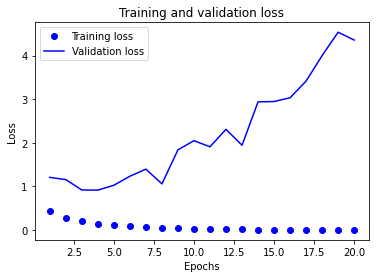

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

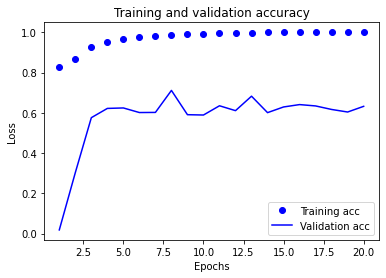

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5050 - binary_accuracy: 0.7837 - val_loss: 0.3719 - val_binary_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2907 - binary_accuracy: 0.9042 - val_loss: 0.3015 - val_binary_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2122 - binary_accuracy: 0.9292 - val_loss: 0.2916 - val_binary_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1726 - binary_accuracy: 0.9414 - val_loss: 0.2842 - val_binary_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1397 - binary_accuracy: 0.9540 - val_loss: 0.2859 - val_binary_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1147 - binary_accuracy: 0.9647 - val_loss: 0.2994 - val_binary_accuracy: 0.8856
Epoch

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

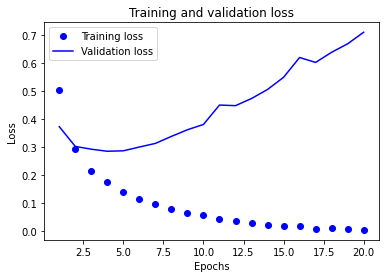

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

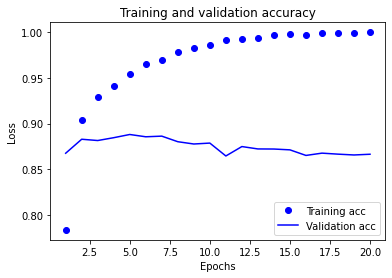

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_test = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5242 - binary_accuracy: 0.7859 - val_loss: 0.3997 - val_binary_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3162 - binary_accuracy: 0.9019 - val_loss: 0.3173 - val_binary_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2276 - binary_accuracy: 0.9279 - val_loss: 0.2871 - val_binary_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1760 - binary_accuracy: 0.9436 - val_loss: 0.2959 - val_binary_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1466 - binary_accuracy: 0.9527 - val_loss: 0.3060 - val_binary_accuracy: 0.8773
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1190 - binary_accuracy: 0.9627 - val_loss: 0.3060 - val_binary_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

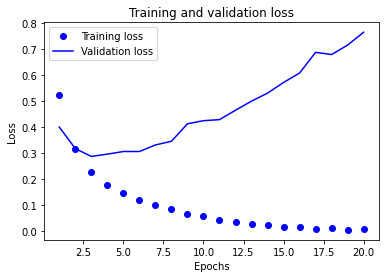

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

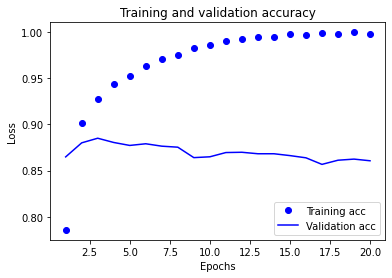

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Count

In [ ]:
'''
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
'''
# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='count')
x_test = tok.texts_to_matrix(tst_texts, mode='count')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)


In [ ]:
x_train

array([[ 0., 13.,  0., ...,  0.,  0.,  0.],
       [ 0.,  8.,  0., ...,  0.,  0.,  0.],
       [ 0.,  7.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0., 18.,  2., ...,  0.,  0.,  0.],
       [ 0.,  1.,  2., ...,  0.,  0.,  0.]])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
18/18 [==============================] - 2s 64ms/step - loss: 0.5436 - binary_accuracy: 0.7730 - val_loss: 0.4399 - val_binary_accuracy: 0.8462
Epoch 2/20
18/18 [==============================] - 1s 37ms/step - loss: 0.3342 - binary_accuracy: 0.8987 - val_loss: 0.3495 - val_binary_accuracy: 0.8747
Epoch 3/20
18/18 [==============================] - 1s 37ms/step - loss: 0.2420 - binary_accuracy: 0.9252 - val_loss: 0.3228 - val_binary_accuracy: 0.8823
Epoch 4/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1849 - binary_accuracy: 0.9444 - val_loss: 0.3188 - val_binary_accuracy: 0.8810
Epoch 5/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1474 - binary_accuracy: 0.9574 - val_loss: 0.3310 - val_binary_accuracy: 0.8763
Epoch 6/20
18/18 [==============================] - 1s 36ms/step - loss: 0.1146 - binary_accuracy: 0.9699 - val_loss: 0.3442 - val_binary_accuracy: 0.8742
Epoch 7/20
18/18 [==============================] - 1s 36ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

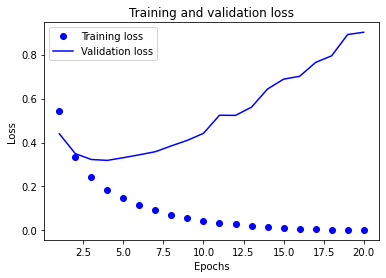

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

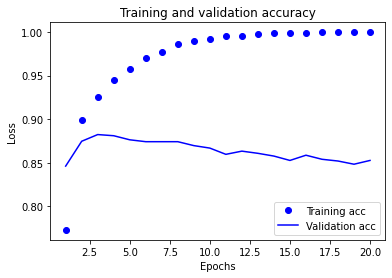

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Freq

In [ ]:
# '''
# trn_texts,trn_labels = get_texts(PATH/'train')
# tst_texts,tst_labels = get_texts(PATH/'test')

# trn_texts = normalize_corpus(trn_texts)
# tst_texts = normalize_corpus(tst_texts)

# vocab_sz = 10000
# tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
# tok.fit_on_texts(trn_texts + tst_texts)
# #vocab_sz = len(tok.word_index)
# '''
# # Extract binary BoW features
# x_train = tok.texts_to_matrix(trn_texts, mode='freq')
# x_test = tok.texts_to_matrix(tst_texts, mode='freq')
# y_train = np.asarray(trn_labels).astype('float32')
# y_test = np.asarray(tst_labels).astype('float32')

# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
# x_train.shape

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])
			  
# history = model.fit(x_train,
#                     y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))
# history_dict = history.history
# history_dict.keys()

In [ ]:
# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'bo', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [ ]:
# plt.clf()   # clear figure
# acc_values = history_dict['binary_accuracy']
# val_acc_values = history_dict['val_binary_accuracy']

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [ ]:
# TF-IDF features

In [ ]:
'''
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)
'''
# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='tfidf')
x_test = tok.texts_to_matrix(tst_texts, mode='tfidf')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
x_train.shape